In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from datetime import datetime, date, time, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mtick
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import svm
plt.style.use('ggplot')

In [2]:
df=pd.read_csv("C:/Users/CHITRAK/Desktop/Data scientist/Micro Credit/Data file.csv")
print(df)

        Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_d

In [3]:
print(f"{df.dtypes}\n")
print(f"Sum of null values in each feature:\n{35 * '-'}")
print(f"{df.isnull().sum()}")
df.head()

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Positive examples = 183431
Negative examples = 26162
Proportion of positive to negative examples = 701.14%


c:\users\chitrak\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


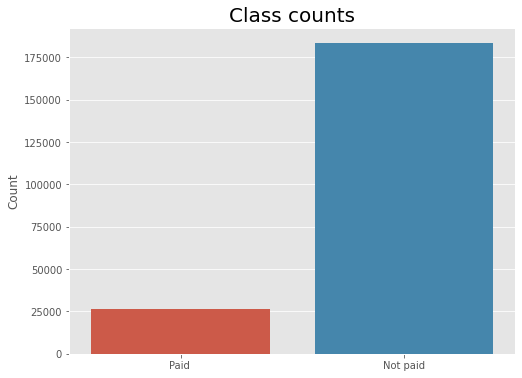

In [4]:
import matplotlib.pyplot as plt

pos = df[df["label"] == 1].shape[0]
neg = df[df["label"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(df["label"])
plt.xticks((0, 1 ), ["Paid ", "Not paid"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [5]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['aon']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


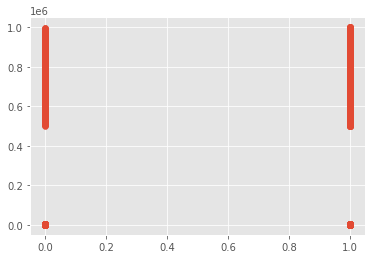

In [6]:
plt.scatter(x=df.label, y=df.aon)

In [7]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

In [8]:
df_lm1=sm.OLS(train_y,train_x).fit()

In [9]:
print (df_lm1.params)

const    8435.386717
label    -372.302560
dtype: float64


In [10]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['daily_decr30']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


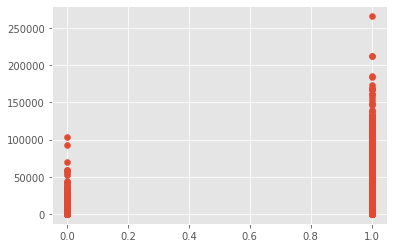

In [11]:
plt.scatter(x=df.label, y=df.daily_decr30)

In [12]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

In [13]:
df_lm2=sm.OLS(train_y,train_x).fit()

In [14]:
print (df_lm2.params)

const    1278.420148
label    4686.957810
dtype: float64


In [15]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['daily_decr90']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


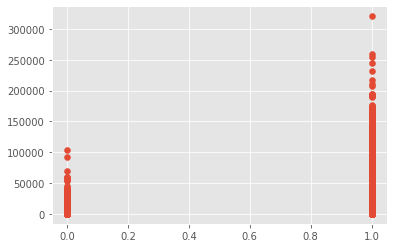

In [16]:
plt.scatter(x=df.label, y=df.daily_decr90)

In [17]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

In [18]:
df_lm3=sm.OLS(train_y,train_x).fit()

In [19]:
print (df_lm3.params)

const    1284.82577
label    5485.34679
dtype: float64


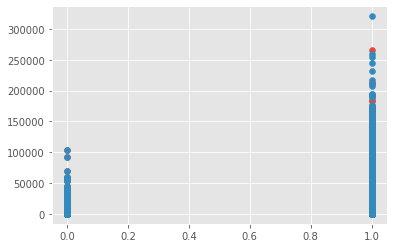

In [20]:
plt.scatter(x=df.label, y=df.daily_decr30)
plt.scatter(x=df.label, y=df.daily_decr90)

In [21]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['rental30']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


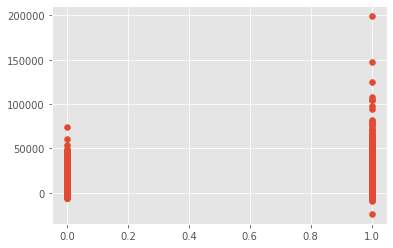

In [22]:
plt.scatter(x=df.label, y=df.rental30)

In [23]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

In [24]:
df_lm4=sm.OLS(train_y,train_x).fit()

In [25]:
print (df_lm4.params)

const    2034.252741
label     753.196202
dtype: float64


In [26]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['rental90']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


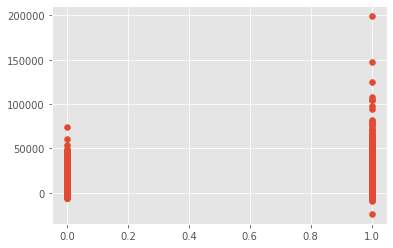

In [27]:
plt.scatter(x=df.label, y=df.rental30)

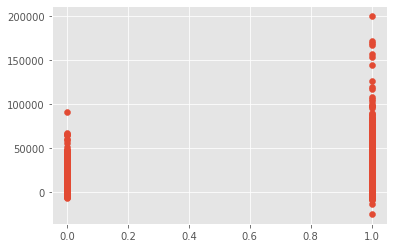

In [28]:
plt.scatter(x=df.label, y=df.rental90)

In [29]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

df_lm5=sm.OLS(train_y,train_x).fit()

print (df_lm5.params)

const    2336.135296
label    1310.178094
dtype: float64


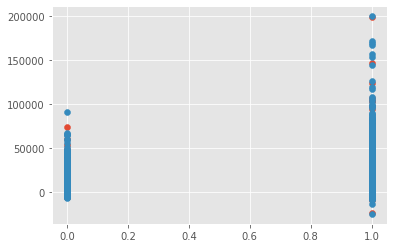

In [30]:
plt.scatter(x=df.label, y=df.rental30)
plt.scatter(x=df.label, y=df.rental90)

In [31]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['cnt_ma_rech30']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


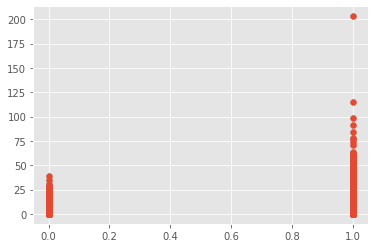

In [32]:
plt.scatter(x=df.label, y=df.cnt_ma_rech30)

In [33]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

df_lm6=sm.OLS(train_y,train_x).fit()

print (df_lm6.params)

const    1.295597
label    3.057378
dtype: float64


In [34]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['fr_ma_rech30']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


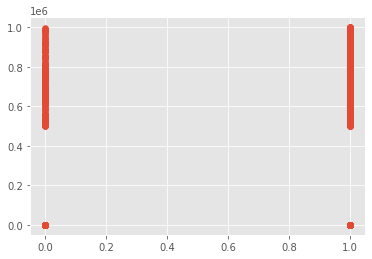

In [35]:
plt.scatter(x=df.label, y=df.fr_ma_rech30)

In [36]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

df_lm7=sm.OLS(train_y,train_x).fit()

print (df_lm7.params)

const    3576.453778
label     184.650090
dtype: float64


In [37]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['medianamnt_ma_rech30']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


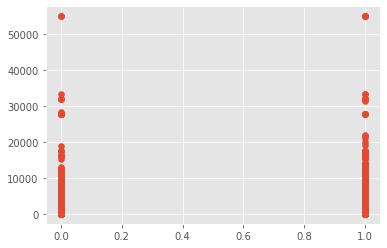

In [38]:
plt.scatter(x=df.label, y=df.medianamnt_ma_rech30)

In [39]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

df_lm8=sm.OLS(train_y,train_x).fit()

print (df_lm8.params)

const    1049.005510
label     877.423668
dtype: float64


In [40]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['fr_da_rech30']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


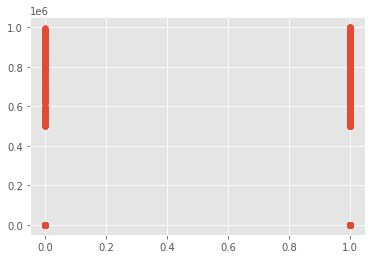

In [41]:
plt.scatter(x=df.label, y=df.fr_da_rech30)

In [42]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

df_lm9=sm.OLS(train_y,train_x).fit()

print (df_lm9.params)

const    3496.938112
label     307.523904
dtype: float64


In [43]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['cnt_da_rech90']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


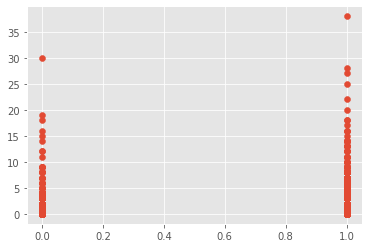

In [44]:
plt.scatter(x=df.label, y=df.cnt_da_rech90)

In [45]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

df_lm10=sm.OLS(train_y,train_x).fit()

print (df_lm10.params)

const    0.038452
label    0.004216
dtype: float64


In [46]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['cnt_loans30']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


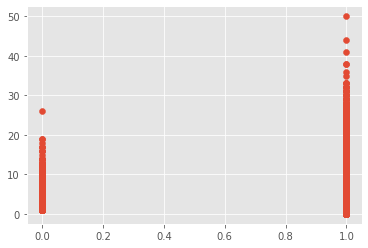

In [47]:
plt.scatter(x=df.label, y=df.cnt_loans30)

In [48]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

df_lm11=sm.OLS(train_y,train_x).fit()

print (df_lm11.params)

const    1.424884
label    1.517377
dtype: float64


In [49]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['amnt_loans30']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


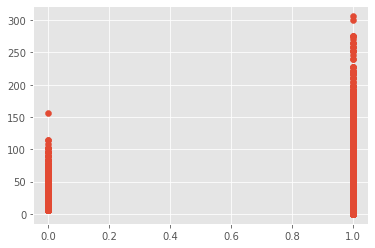

In [50]:
plt.scatter(x=df.label, y=df.amnt_loans30)

In [51]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

df_lm12=sm.OLS(train_y,train_x).fit()

print (df_lm12.params)

const     8.830113
label    10.381845
dtype: float64


In [52]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['maxamnt_loans30']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


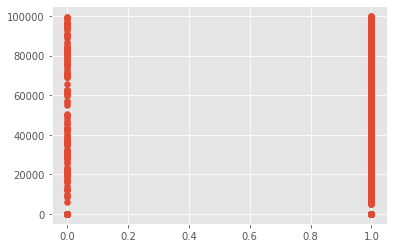

In [53]:
plt.scatter(x=df.label, y=df.maxamnt_loans30)

In [54]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

df_lm13=sm.OLS(train_y,train_x).fit()

print (df_lm13.params)

const    270.737214
label     -5.717828
dtype: float64


In [55]:
import statsmodels.api as sm
x=sm.add_constant(df['label'])
y=df['medianamnt_loans30']
x.head(209593)

,const,label
0,1.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
209588,1.0,1
209589,1.0,1
209590,1.0,1
209591,1.0,1


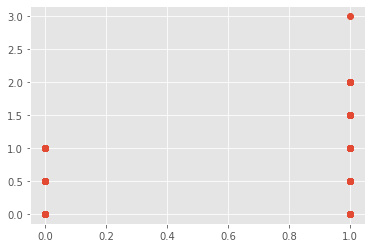

In [56]:
plt.scatter(x=df.label, y=df.medianamnt_loans30)

In [57]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,random_state=100)

df_lm14=sm.OLS(train_y,train_x).fit()

print (df_lm14.params)

const    0.027575
label    0.030296
dtype: float64


In [58]:
x=sm.add_constant(df['amnt_loans30'])
y=df['amnt_loans90']
x.head(209593)

,const,amnt_loans30
0,1.0,12
1,1.0,12
2,1.0,6
3,1.0,12
4,1.0,42
...,...,...
209588,1.0,12
209589,1.0,18
209590,1.0,42
209591,1.0,18


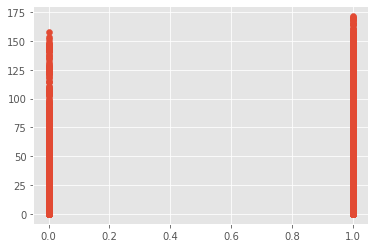

In [61]:
plt.scatter(x=df.label, y=df.payback30)

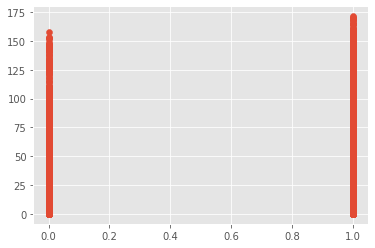

In [63]:
plt.scatter(x=df.label, y=df.payback90)